# Logistic model fitting using Sequential Monte Carlo

This example illustrates how to use SMC to sample from a posterior distribution for the logistic model, with normal errors. This example also indicates how it is typically necessary to tune hyperparameters to ensure good algorithmic performance on a given problem.

In [1]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [-5, 400, noise*0.1],
    [5, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Select mean and variance matrix of initial proposal dist
x0 = [0.015,500,10]

# Create mcmc routine
sampler = pints.SMC(log_posterior, x0)

# Set number of particles
sampler.set_particles(5000)

# Run sampler
samples = sampler.run()

Running sequential Monte Carlo
Total number of particles: 5000
Number of temperatures: 10
Resampling at end of each iteration
Number of MCMC steps at each temperature: 1
Sampling from distribution of temperature: 0.000278255940221
[[  1.04315385e-02   5.02393398e+02   1.02495532e+01]
 [  9.50412354e-03   4.98871676e+02   1.01972800e+01]
 [  1.16861850e-02   5.00868916e+02   9.77464321e+00]
 [ -4.76187459e-03   5.00524945e+02   1.01191855e+01]
 [  3.89713845e-03   4.98696873e+02   1.04112743e+01]
 [  2.92043794e-02   4.98925053e+02   9.90674517e+00]
 [  1.46824189e-02   5.00322163e+02   9.99906033e+00]
 [  1.32323670e-02   4.99259119e+02   1.02681771e+01]
 [  8.94516426e-03   5.01732247e+02   9.70123955e+00]
 [  1.01181301e-03   4.98490366e+02   1.05712233e+01]]
Sampling from distribution of temperature: 0.000774263682681
[[  1.46824189e-02   5.00322163e+02   9.99906033e+00]
 [  1.46824189e-02   5.00322163e+02   9.99906033e+00]
 [  1.46824189e-02   5.00322163e+02   9.99906033e+00]
 [  1

## Poor performance with default hyperparameters

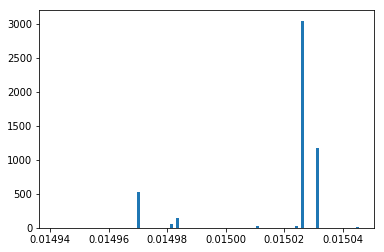

5000.0


In [2]:
plt.hist(samples[:, 0],100)
plt.show()
print(sampler.ess())

## Change resampling threshold and also turn off resampling at the end of the algorithm

In [3]:
# Don't resample at end of steps 2 and 3 in Del Moral et al. (2006) Algorithm 3.1.1
sampler.set_resample_end_2_3(False)

# Set ESS resampling threshold (essentially we never resample with this threshold)
sampler.set_ess_threshold(5)

# Run sampler
samples = sampler.run()

Running sequential Monte Carlo
Total number of particles: 5000
Number of temperatures: 10
Not resampling at end of each iteration
Number of MCMC steps at each temperature: 1
Sampling from distribution of temperature: 0.000278255940221
[[  3.98335424e-03   4.95600392e+02   1.02798902e+01]
 [  1.21895396e-02   4.98632599e+02   9.54653988e+00]
 [  1.97649676e-02   5.02926203e+02   1.00570632e+01]
 [  1.18627379e-02   5.00079456e+02   9.46604584e+00]
 [  1.54538367e-02   4.95962903e+02   1.01488286e+01]
 [  1.83229572e-02   4.99148803e+02   9.25626883e+00]
 [  1.13373556e-02   5.02979866e+02   1.05160402e+01]
 [  1.02552427e-02   5.02226949e+02   1.06309080e+01]
 [  1.54418164e-02   4.98897005e+02   1.01568868e+01]
 [  5.23882685e-03   4.99522513e+02   9.90094848e+00]]
Sampling from distribution of temperature: 0.000774263682681
[[  3.98335424e-03   4.95600392e+02   1.02798902e+01]
 [  1.21895396e-02   4.98632599e+02   9.54653988e+00]
 [  1.97649676e-02   5.02926203e+02   1.00570632e+01]
 

pints/_sequential/_sequentialMC.py:206: RuntimeWarning: divide by zero encountered in log
  return np.log(w_old) + w_tilde_value


Sampling from distribution of temperature: 0.00599484250319
[[  3.98335424e-03   4.95600392e+02   1.02798902e+01]
 [  1.21895396e-02   4.98632599e+02   9.54653988e+00]
 [  1.97649676e-02   5.02926203e+02   1.00570632e+01]
 [  1.18627379e-02   5.00079456e+02   9.46604584e+00]
 [  1.54538367e-02   4.95962903e+02   1.01488286e+01]
 [  1.83229572e-02   4.99148803e+02   9.25626883e+00]
 [  1.13373556e-02   5.02979866e+02   1.05160402e+01]
 [  1.02552427e-02   5.02226949e+02   1.06309080e+01]
 [  1.54418164e-02   4.98897005e+02   1.01568868e+01]
 [  5.23882685e-03   4.99522513e+02   9.90094848e+00]]
Sampling from distribution of temperature: 0.016681005372
[[  3.98335424e-03   4.95600392e+02   1.02798902e+01]
 [  1.21895396e-02   4.98632599e+02   9.54653988e+00]
 [  1.97649676e-02   5.02926203e+02   1.00570632e+01]
 [  1.18627379e-02   5.00079456e+02   9.46604584e+00]
 [  1.54538367e-02   4.95962903e+02   1.01488286e+01]
 [  1.83229572e-02   4.99148803e+02   9.25626883e+00]
 [  1.13373556e-0

## Now does much better

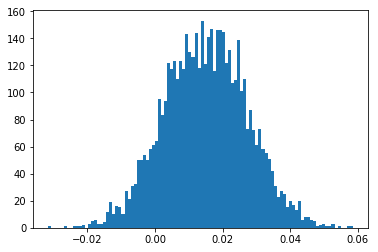

In [4]:
plt.hist(samples[:, 0], 100)
plt.show()

In [5]:
samples

array([[  3.98335424e-03,   4.95600392e+02,   1.02798902e+01],
       [  1.21895396e-02,   4.98632599e+02,   9.54653988e+00],
       [  1.97649676e-02,   5.02926203e+02,   1.00570632e+01],
       ..., 
       [  1.53261376e-02,   4.96954893e+02,   1.04039866e+01],
       [  1.76951674e-02,   4.96715602e+02,   9.57646506e+00],
       [  1.49350420e-02,   4.97993450e+02,   1.02814720e+01]])

In [6]:
weights = sampler.weights()

In [7]:
weights

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         4.18011151e-68,   0.00000000e+00,   1.13748300e-15])

In [8]:
sampler._w_tilde([0.015,511,10],[0.015,500,10],0.5,1)

-2003.7590372327663

In [9]:
new_samples = sampler._kernel_sample(samples,1)

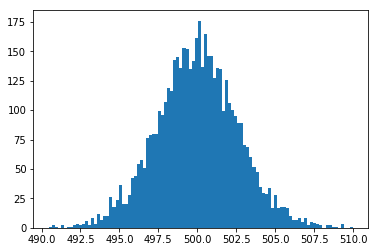

In [10]:
plt.hist(new_samples[:, 1], 100)
plt.show()

In [11]:
a_sample = [  1.49332076e-02,   5.00383195e+02,   1.01806092e+01]
a_sample = [  1.46108022e-02,   4.98713789e+02,   1.00740296e+01]

In [12]:
for i in range(1000):
    proposed = np.random.multivariate_normal(
                mean=a_sample, cov=sampler._sigma0, size=1)[0]
    print(sampler._tempered_distribution(proposed, 1) - sampler._tempered_distribution(a_sample, 1))

-161932.756595
-53563.4930707
-732389.64352
-103124.305945
-102635.533506
-107927.990688
-338436.207471
-99282.4740997
-490442.817168
-59137.154319
-696716.51941
-219148.376702
-728531.697978
-275625.400223
-688268.527489
-113210.86551
-6906.74118679
-157152.103222
-728334.503829
-65041.6412342
-51645.0030018
-127659.131644
-417978.390844
-9997.55152938
-32069.3110922
-618672.035407
-90296.6640747
-164780.942643
-106693.648571
-51319.7087175
-110208.951933
-127219.235324
-68483.085997
-58576.8588842
-10953.773482
-711950.948392
-703742.29426
-63372.498693
-60885.8358212
-125974.223368
-395093.197389
-710739.107582
-57704.3314931
-44356.4020945
-27177.8536808
-18128.4101588
-57604.9627816
-90662.8100965
-53965.3680498
-541376.964199
-640114.22375
-14711.896839
-81962.6593893
-124201.910718
-610142.335229
-710876.229763
-575329.343176
-2225.60473074
-689966.295649
-41063.6742765
-3266.65888032
-52369.7083664
-98687.3737343
-107065.598783
-11391.3654709
-132624.681132
-195337.247962
-2326

-5576.68351364
-467244.645758
-5001.89425782
-98740.9176332
-753551.919767
-7831.52066928
-9268.36956959
-288625.285784
-126050.46642
-186351.940406
-36193.2280241
-659364.93933
-25132.9428157
-80122.1549043
-267.620256413
-6627.0770241
-57584.9115301
-669875.379032
-29839.7765519
-673138.497781
-39502.1887268
-140253.292598
-68143.8620125
-114202.766865
-743879.90467
-20547.6551715
34.6713382773
-614643.817833
-680780.689195
-158731.906009
-624294.869818
-31120.2510522
-53351.2910882
-35611.9671058
-106683.139518
-24351.9652172
-1738.44923485
-11955.5701295
-726646.756837
-18703.3936658
-8799.00488781
-5496.54490739
-22914.0652827
-24867.5698638
-7258.86261007
-57953.3074672
-50640.2012693
-131483.478087
-621000.17528
-82630.1593344
-57518.2961817
-927.039846304
-49761.4479812
-686083.890346
-46854.6015582
-603470.068024
-19948.6380246
-101722.960869
-25896.8549812
313.379409805
-2832.78441955
-156209.534791
-627392.395326
-154188.974143
-160203.194796
-482365.96328
-250076.891828
-79

In [13]:
sampler._sigma0

array([[  1.50000000e-04,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   5.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e-01]])